# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking '\n'
Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [9]:
df.shape

(50000, 14)

In [117]:
df['booking_origin'].unique()

array([ 61,  36, 100,  17,  85,  43,  51,  80,  90,  28,  37,  21, 103,
        93,  86,  75,  40,  42,  81,  99,  95,  77,   0,  78,  59,  74,
        34,  71,  87,  27,  19, 101,  48,  35,  73,  20,   4,  14,  72,
         9,  65,   7,  45,  11,  97,  46,  91,  12,  16,  13,  98,  23,
        18,  38,   6,  83,  82,  54,  58,  76,  47,  55,  89,   5,  49,
        44,  31,  56,  15,  92,  70,  94,   3,  60,  50,  57,  64,  67,
        10,  63,  26,  62,  52,  24,  41,  96,  84,  68,  69,  25,  79,
         1,  32,  22,  53, 102,   8,  66,  39,  29,  30,  33,   2,  88])

In [10]:
df.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0


In [11]:
cat_col = df.select_dtypes(include='object').columns.to_list()
cat_col

['sales_channel', 'trip_type', 'route', 'booking_origin']

# data preprocessing

In [12]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
le = LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [13]:
df.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,6,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,6,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,3,0,36,1,1,0,5.52,0


In [60]:
df.iloc[:,-1].value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [14]:
mm = MinMaxScaler(feature_range=(0,1))
a = mm.fit_transform(df)
df1 = pd.DataFrame(a,columns = df.columns)

In [15]:
df1.sample(2)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
45952,0.125,0.0,1.0,0.054210,0.007712,0.391304,0.000000,0.426065,0.495146,1.0,1.0,1.0,0.082816,0.0
11707,0.125,0.0,1.0,0.215686,0.212082,0.956522,0.666667,0.458647,0.970874,1.0,1.0,1.0,0.809524,0.0


In [16]:
df1.iloc[:,-1].unique()

array([0., 1.])

In [17]:
df1.shape

(50000, 14)

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

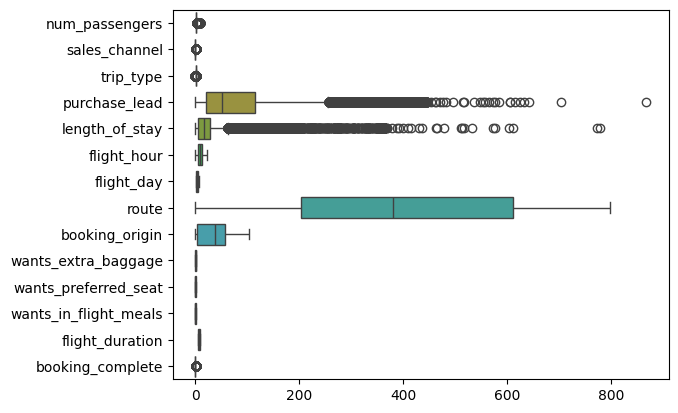

In [19]:
sns.boxplot(data = df,orient = 'h')
plt.show()

In [20]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [21]:
X.sample()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
804,0.0,0.0,1.0,0.272203,0.026992,0.304348,0.666667,0.007519,0.495146,1.0,0.0,1.0,0.861284


In [22]:
y.sample(5)

8564     0.0
9247     0.0
18384    0.0
28935    0.0
38234    0.0
Name: booking_complete, dtype: float64

# Model Building 

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state=1)

In [24]:
X_train.shape

(33500, 13)

In [25]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import GridSearchCV as gsv
max_d = [3,5,7,10]
n_est = [100,110,120]
max_features = ['sqrt', 'log2']
param_g = dict(max_depth = max_d,n_estimators = n_est,max_features=max_features)
param_g

{'max_depth': [3, 5, 7, 10],
 'n_estimators': [100, 110, 120],
 'max_features': ['sqrt', 'log2']}

In [62]:
rfc = RFC(random_state = 42,class_weight = 'balanced')#as the data is Imbalance in a view of target variable 
grid = gsv(estimator = rfc,param_grid = param_g,cv = 10,n_jobs = -1)

In [63]:
grid_result = grid.fit(X_train,y_train)

In [64]:
best_model = grid_result.best_estimator_
best_model

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=120,
                       random_state=42)

In [65]:
feature_imp = best_model.feature_importances_
feature_imp

array([0.02251921, 0.01982346, 0.00561963, 0.08844007, 0.114019  ,
       0.0556811 , 0.03342123, 0.13998544, 0.35332041, 0.03561894,
       0.02057121, 0.01567135, 0.09530896])

In [66]:
imp_df = pd.DataFrame({'Feature':X_train.columns,
                      'Importance':feature_imp})
imp_df

,Feature,Importance
0,num_passengers,0.022519
1,sales_channel,0.019823
2,trip_type,0.005620
3,purchase_lead,0.088440
4,length_of_stay,0.114019
5,flight_hour,0.055681
6,flight_day,0.033421
7,route,0.139985
8,booking_origin,0.353320
9,wants_extra_baggage,0.035619


In [67]:
imp_df = imp_df.sort_values(by='Importance',ascending = False)
imp_df

,Feature,Importance
8,booking_origin,0.353320
7,route,0.139985
4,length_of_stay,0.114019
12,flight_duration,0.095309
3,purchase_lead,0.088440
5,flight_hour,0.055681
9,wants_extra_baggage,0.035619
6,flight_day,0.033421
0,num_passengers,0.022519
10,wants_preferred_seat,0.020571


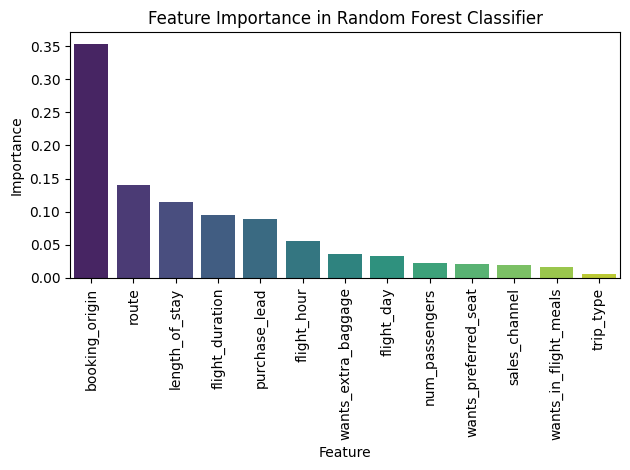

In [116]:
fig = plt.figure()
sns.barplot(x = 'Feature',y  = 'Importance',data = imp_df,palette = 'viridis')
plt.title('Feature Importance in Random Forest Classifier')
plt.xticks(rotation=90)
plt.tight_layout()
fig.savefig("data/IMPfeatures.png")
plt.show()

In [69]:
heat_df = imp_df.set_index('Feature')[['Importance']] 
heat_df

,Importance
Feature,
booking_origin,0.353320
route,0.139985
length_of_stay,0.114019
flight_duration,0.095309
purchase_lead,0.088440
flight_hour,0.055681
wants_extra_baggage,0.035619
flight_day,0.033421
num_passengers,0.022519


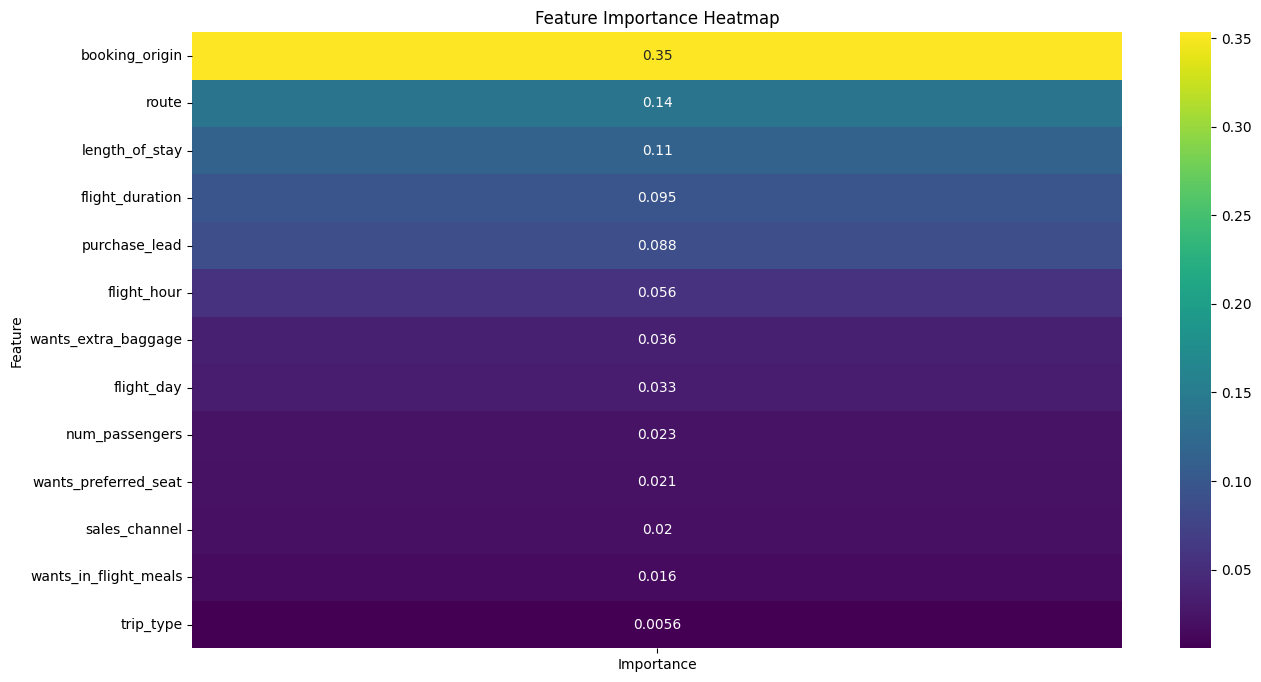

In [90]:
fig = plt.figure()
sns.heatmap(heat_df, annot=True, cmap='viridis')
plt.title('Feature Importance Heatmap')
fig.set_size_inches(15,8)
fig.savefig('data/Feature Importance.png')
plt.show()

In [71]:
imp_df.head()

,Feature,Importance
8,booking_origin,0.353320
7,route,0.139985
4,length_of_stay,0.114019
12,flight_duration,0.095309
3,purchase_lead,0.088440


In [72]:
print(grid_result.best_params_)

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 120}


In [73]:
grid_result.best_score_

0.7233432835820894

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.578404,0.038879,0.030446,0.004977,3,sqrt,100,"{'max_depth': 3, 'max_features': 'sqrt', 'n_es...",0.534925,0.521194,...,0.516418,0.518806,0.523881,0.535522,0.540299,0.533433,0.539104,0.527642,0.009588,23
1,1.730207,0.046982,0.033159,0.001982,3,sqrt,110,"{'max_depth': 3, 'max_features': 'sqrt', 'n_es...",0.537015,0.521791,...,0.520597,0.520299,0.524179,0.535821,0.537015,0.529552,0.539403,0.527791,0.008783,21
2,1.826635,0.072909,0.036847,0.004401,3,sqrt,120,"{'max_depth': 3, 'max_features': 'sqrt', 'n_es...",0.544478,0.526269,...,0.522985,0.522090,0.526567,0.536418,0.540896,0.534328,0.543582,0.531284,0.009550,19
3,1.590068,0.069034,0.031132,0.003660,3,log2,100,"{'max_depth': 3, 'max_features': 'log2', 'n_es...",0.534925,0.521194,...,0.516418,0.518806,0.523881,0.535522,0.540299,0.533433,0.539104,0.527642,0.009588,23
4,1.688384,0.069517,0.031606,0.002300,3,log2,110,"{'max_depth': 3, 'max_features': 'log2', 'n_es...",0.537015,0.521791,...,0.520597,0.520299,0.524179,0.535821,0.537015,0.529552,0.539403,0.527791,0.008783,21
5,1.831700,0.066225,0.037797,0.006013,3,log2,120,"{'max_depth': 3, 'max_features': 'log2', 'n_es...",0.544478,0.526269,...,0.522985,0.522090,0.526567,0.536418,0.540896,0.534328,0.543582,0.531284,0.009550,19
6,2.150304,0.036451,0.045145,0.003204,5,sqrt,100,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.608955,0.591045,...,0.592239,0.581791,0.594627,0.599403,0.605970,0.594030,0.586269,0.594209,0.008097,15
7,2.432856,0.074700,0.048683,0.006224,5,sqrt,110,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.610448,0.589254,...,0.591642,0.577910,0.594030,0.600896,0.602687,0.593134,0.585075,0.592985,0.009142,17
8,2.621656,0.055589,0.051972,0.002544,5,sqrt,120,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.608955,0.592239,...,0.592537,0.583284,0.598209,0.602985,0.602687,0.597015,0.584478,0.594567,0.008538,13
9,2.198513,0.041821,0.042606,0.005788,5,log2,100,"{'max_depth': 5, 'max_features': 'log2', 'n_es...",0.608955,0.591045,...,0.592239,0.581791,0.594627,0.599403,0.605970,0.594030,0.586269,0.594209,0.008097,15


In [75]:
y_pred = best_model.predict(X_test)
y_pred

array([0., 0., 0., ..., 1., 0., 0.])

In [76]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_squared_error,ConfusionMatrixDisplay
accuracy_score(y_pred,y_test)*100

71.92121212121212

In [77]:
cm = confusion_matrix(y_pred,y_test)
cm

array([[10178,   819],
       [ 3814,  1689]], dtype=int64)

In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.73      0.81     13992
         1.0       0.31      0.67      0.42      2508

    accuracy                           0.72     16500
   macro avg       0.62      0.70      0.62     16500
weighted avg       0.83      0.72      0.75     16500



In [79]:
mean_squared_error(y_pred,y_test)

0.2807878787878788

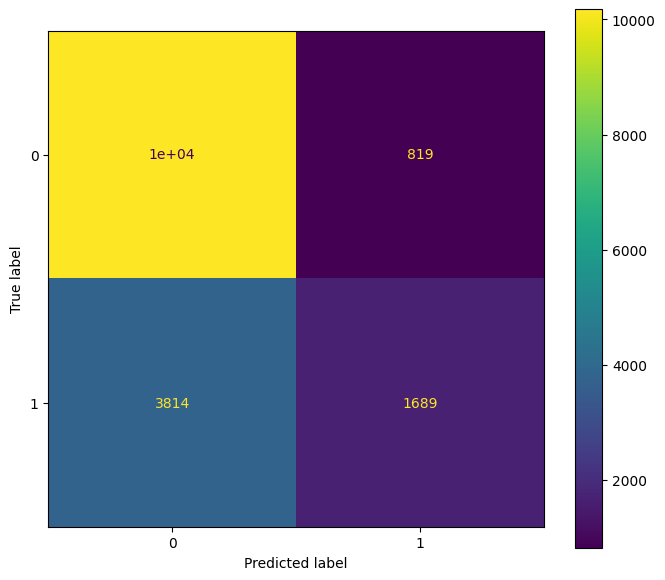

In [86]:
fig,ax = plt.subplots()

ConfusionMatrixDisplay(cm).plot(ax = ax)


fig.set_size_inches(8,7)
fig.savefig('data/ConfusionMatrix.png',dpi = 300)
plt.show()

In [92]:
resDF = pd.DataFrame(grid.cv_results_)
resDF.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.578404,0.038879,0.030446,0.004977,3,sqrt,100,"{'max_depth': 3, 'max_features': 'sqrt', 'n_es...",0.534925,0.521194,...,0.516418,0.518806,0.523881,0.535522,0.540299,0.533433,0.539104,0.527642,0.009588,23
1,1.730207,0.046982,0.033159,0.001982,3,sqrt,110,"{'max_depth': 3, 'max_features': 'sqrt', 'n_es...",0.537015,0.521791,...,0.520597,0.520299,0.524179,0.535821,0.537015,0.529552,0.539403,0.527791,0.008783,21


In [93]:
from sklearn.model_selection import cross_validate
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',  
    'recall': 'recall',
    'f1': 'f1'
}
cv_scores = cross_validate(best_model, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1)

In [94]:
cv_scores

{'fit_time': array([2.75098443, 2.74285007, 2.74184823, 2.7318418 , 2.71265674]),
 'score_time': array([0.14277935, 0.12264562, 0.14283729, 0.13265204, 0.12619662]),
 'test_accuracy': array([0.73134328, 0.71552239, 0.7261194 , 0.72746269, 0.73358209]),
 'test_precision': array([0.31150608, 0.29661017, 0.30648873, 0.30451128, 0.31085605]),
 'test_recall': array([0.67002012, 0.66901408, 0.67002012, 0.65191147, 0.65392354]),
 'test_f1': array([0.42528736, 0.41100124, 0.42058731, 0.41511851, 0.42139384])}

In [96]:
import numpy as np
metrics_summary = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Mean': [
        np.mean(cv_scores['test_accuracy']),
        np.mean(cv_scores['test_precision']),
        np.mean(cv_scores['test_recall']),
        np.mean(cv_scores['test_f1'])
    ],
    'Std': [
        np.std(cv_scores['test_accuracy']),
        np.std(cv_scores['test_precision']),
        np.std(cv_scores['test_recall']),
        np.std(cv_scores['test_f1'])
    ]
}
metrics_df = pd.DataFrame(metrics_summary)
metrics_df

,Metric,Mean,Std
0,Accuracy,0.726806,0.006241
1,Precision,0.305994,0.005376
2,Recall,0.662978,0.008247
3,F1-Score,0.418678,0.005026


In [98]:
grid_result.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 120}

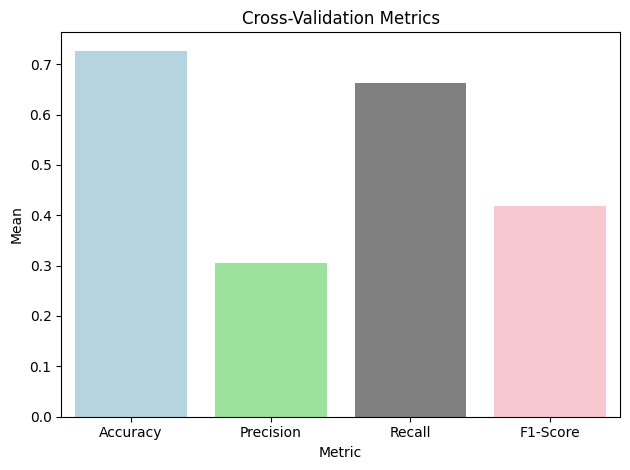

In [115]:
fig = plt.figure()
sns.barplot(data = metrics_df,x = 'Metric',y  = 'Mean',palette=['lightblue', 'lightgreen', 'grey', 'pink'])
plt.title('Cross-Validation Metrics')

plt.tight_layout()
fig.savefig('data/metrics_plot.png')
plt.show()
